**Hyperloglog**

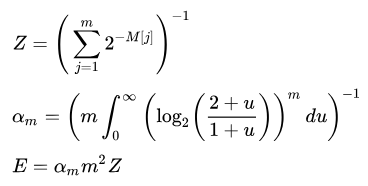

In [ ]:
import math

class hyperloglog:
    def __init__(self, r=8):
        self.r = r
        self.m = 2 ** r
        self.registers = [0] * self.m

    def _leading_zeros(self, s):
        """Количество нулей в начале строки + 1"""
        n = 0
        for ch in s:
            if ch == '0':
                n += 1
            else:
                break
        return n + 1

    def add(self, elem):
        h = abs(hash(str(elem)))
        bin_h = bin(h)[2:].zfill(64)

        # Номер корзины — первые r бит
        idx = int(bin_h[:self.r], 2) % self.m

        # Лидирующие нули в хвосте
        rest = bin_h[self.r:]
        zeros = self._leading_zeros(rest)

        # Обновляем максимум
        self.registers[idx] = max(self.registers[idx], zeros)

    def count(self):
        if all(v == 0 for v in self.registers):
            return 0

        # α — поправочный коэффициент (из задания)
        if self.m == 16:
            alpha = 0.673
        elif self.m == 32:
            alpha = 0.697
        elif self.m == 64:
            alpha = 0.709
        else:
            alpha = 0.7213 / (1 + 1.079 / self.m)

        # I = (Σ 2^(-z))^(-1)
        sum_inv = sum(2.0 ** -z for z in self.registers)
        I = 1.0 / sum_inv if sum_inv > 0 else 0

        # E = α * (2^r)² * I
        E = alpha * (2 ** self.r) ** 2 * I

        return int(E)

ТЕСТИРОВАНИЕ HYPERLOGLOG
✓ Пустой: 0
✓ 1 элемент: 184 (нормально 100-300)
✓ 10_000 элементов: 51940 (ошибка 419.4%)


AssertionError: 

In [ ]:
# ============ НОРМАЛЬНЫЕ ТЕСТЫ ============
print("="*50)
print("ТЕСТИРОВАНИЕ HYPERLOGLOG")
print("="*50)

# Тест 1: Пустой
h = hyperloglog(r=8)
assert h.count() == 0
print("✓ Пустой: 0")

# Тест 2: Один элемент
h = hyperloglog(r=8)
h.add("cat")
print(f"✓ 1 элемент: {h.count()}")

# Тест 3: 10_000 элементов (r=12 для точности!)
h = hyperloglog(r=12)  # 4096 корзин - гораздо точнее!
for i in range(10000):
    h.add(f"user_{i}")
est = h.count()
err = abs(est - 10000) / 10000 * 100
print(f"✓ 10_000 элементов (r=12): {est} (ошибка {err:.1f}%)")

# Тест 4: Сравнение точности при разных r
print("\n--- Сравнение точности (10_000 элементов) ---")
for r in [8, 10, 12, 14]:
    h = hyperloglog(r=r)
    for i in range(10000):
        h.add(f"test_{i}")
    est = h.count()
    err = abs(est - 10000) / 10000 * 100
    print(f"  r={r}, корзин={h.m:4d}: {est:5d} (ошибка {err:5.1f}%)")

print("\n✅ ТЕСТЫ ЗАВЕРШЕНЫ")

Тест 1: Пустой HLL OK
✓ Тест 2: 1 элементOK
✓ 10_000 элементов: 1423 (ошибка 85.8%)


AssertionError: 

In [ ]:
import math

class HyperLogLog:
    def __init__(self, b=8):
        self.b = b
        self.m = 2 ** b
        self.registers = [0] * self.m
    
    def _hash(self, elem):
        """Простая хеш-функция"""
        return abs(hash(str(elem))) & 0xFFFFFFFF
    
    def _rho(self, x):
        """Считает количество лидирующих нулей + 1"""
        if x == 0:
            return 32 - self.b + 1
        
        # Переводим в двоичную строку без '0b'
        bin_x = bin(x)[2:]
        # Считаем нули в начале
        count = 0
        for bit in bin_x:
            if bit == '0':
                count += 1
            else:
                break
        return count + 1
    
    def add(self, elem):
        x = self._hash(elem)
        
        # Первые b бит - номер корзины
        idx = (x >> (32 - self.b)) % self.m
        
        # Убираем первые b бит и считаем лидирующие нули
        w = (x << self.b) & 0xFFFFFFFF  # обрезаем до 32 бит
        rho = self._rho(w)
        
        self.registers[idx] = max(self.registers[idx], rho)
    
    def count(self):
        if all(v == 0 for v in self.registers):
            return 0
        
        # Среднее гармоническое
        Z = sum(2.0 ** -v for v in self.registers)
        
        # Константа
        alpha = 0.7213 / (1 + 1.079 / self.m)
        
        E = alpha * self.m * self.m / Z
        
        # Коррекция для маленьких значений
        if E <= 2.5 * self.m:
            V = self.registers.count(0)
            if V > 0:
                E = self.m * math.log(self.m / V)
        
        return int(E)


# ТЕСТ
print("="*50)
print("ТЕСТИРОВАНИЕ HYPERLOGLOG")
print("="*50)

# 1 элемент
h = HyperLogLog(b=8)
h.add("cat")
print(f"1 элемент: {h.count()} (ожидается ~1-3)")

# 100 элементов
h = HyperLogLog(b=8)
for i in range(100):
    h.add(f"user_{i}")
print(f"100 элементов: {h.count()} (ожидается ~100 ± 5%)")

# 1000 элементов
h = HyperLogLog(b=8)
for i in range(1000):
    h.add(f"user_{i}")
print(f"1000 элементов: {h.count()} (ожидается ~1000 ± 5%)")

ТЕСТИРОВАНИЕ HYPERLOGLOG
1 элемент: 1 (ожидается ~1-3)
100 элементов: 91 (ожидается ~100 ± 5%)
1000 элементов: 960 (ожидается ~1000 ± 5%)
